In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn.feature_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [315]:
data = pd.read_csv('einkommen.train')

In [316]:
col_names = ['Age', 'EmpType', 'WFactor', 'Education', 'TrainingPeriod', 'MaritalStatus', 'EmpArea',
                'Partnership', 'Ethnicity', 'Gender', 'Gains', 'Losses', 'WWTime', 'Country', 'Income']
data.columns = col_names

In [317]:
data.head()

,Age,EmpType,WFactor,Education,TrainingPeriod,MaritalStatus,EmpArea,Partnership,Ethnicity,Gender,Gains,Losses,WWTime,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


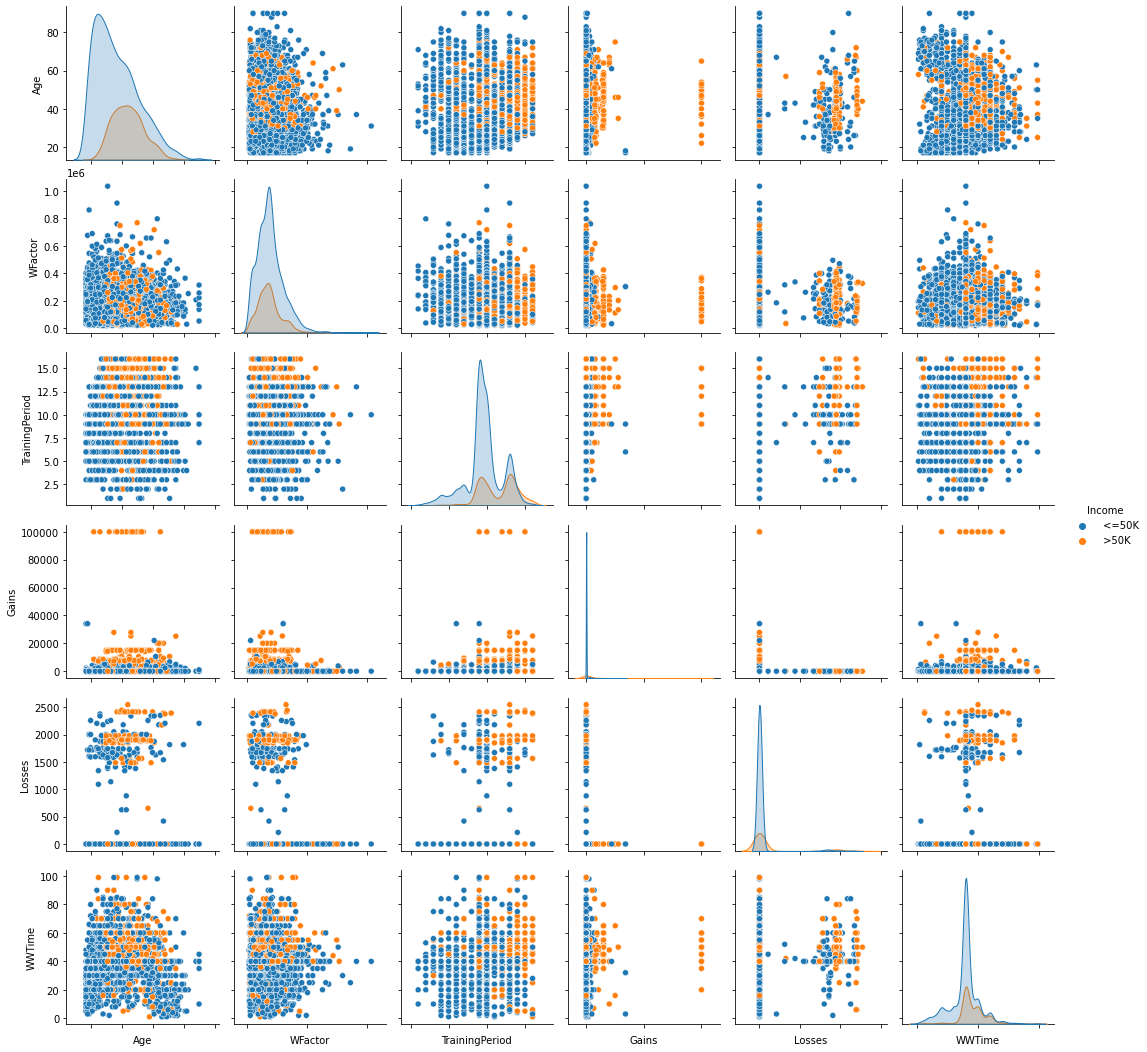

In [318]:
#Displaying Data in the form of a pairplot
data_pairplot = sns.pairplot(data.iloc[:4999], hue="Income")
data_pairplot.set(xticklabels=[])

In [319]:
data.iloc[:5000]

,Age,EmpType,WFactor,Education,TrainingPeriod,MaritalStatus,EmpArea,Partnership,Ethnicity,Gender,Gains,Losses,WWTime,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4996,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K
4998,58,Local-gov,54947,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,55,United-States,<=50K


In [320]:
#Count >50 and <50 Income
print(data['Income'].value_counts())

 ?        25000
 <=50K     3778
 >50K      1221
Name: Income, dtype: int64


In [321]:
#Replace >50 and <50 with numerical values 1 and 0 respectively
data['Income'] = data['Income'].replace(' <=50K', 0)
data['Income'] = data['Income'].replace(' >50K', 1)

print(data['Income'].value_counts())

 ?    25000
0      3778
1      1221
Name: Income, dtype: int64


In [322]:
data[:8]

,Age,EmpType,WFactor,Education,TrainingPeriod,MaritalStatus,EmpArea,Partnership,Ethnicity,Gender,Gains,Losses,WWTime,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1


In [323]:
#Using Pearson Correlation to show Correlated Columns
def correlation(df):
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

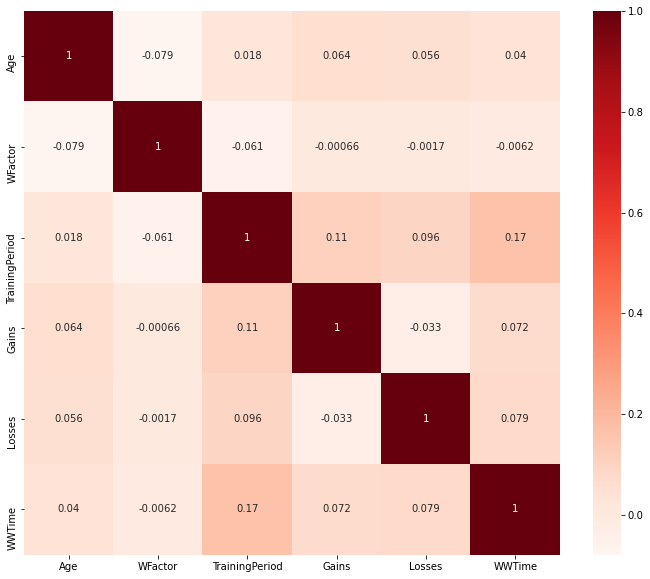

In [324]:
correlation(data.iloc[:4999])

In [325]:
X = data.drop('Income',1)
y = data.Income

In [326]:
X.head()

,Age,EmpType,WFactor,Education,TrainingPeriod,MaritalStatus,EmpArea,Partnership,Ethnicity,Gender,Gains,Losses,WWTime,Country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [327]:
#Now, we will use unique() to identify unique categories in each column, and use the one with the lowest categories
for col_names in X.columns:
    if X[col_names].dtypes=='object':
        u_cat = len(X[col_names].unique())
        print("{col_names} has {u_cat} categories that have been found to be unique".format(col_names = col_names, u_cat = u_cat))

EmpType has 9 categories that have been found to be unique
Education has 16 categories that have been found to be unique
MaritalStatus has 7 categories that have been found to be unique
EmpArea has 15 categories that have been found to be unique
Partnership has 6 categories that have been found to be unique
Ethnicity has 5 categories that have been found to be unique
Gender has 2 categories that have been found to be unique
Country has 42 categories that have been found to be unique


In [328]:
X['Country'].value_counts()

 United-States                 26870
 Mexico                          602
 ?                               539
 Philippines                     177
 Germany                         122
 Canada                          115
 Puerto-Rico                     112
 El-Salvador                      96
 India                            94
 Cuba                             87
 England                          87
 South                            76
 Jamaica                          73
 China                            68
 Italy                            62
 Vietnam                          62
 Dominican-Republic               62
 Guatemala                        60
 Japan                            56
 Poland                           56
 Columbia                         55
 Taiwan                           48
 Haiti                            40
 Iran                             40
 Portugal                         33
 Nicaragua                        32
 Peru                             28
 

In [329]:
#Have 2 sets. One for USA and one for Others
X['Country'] =['United-States' if x == ' United-States' else 'Other' for x in X['Country']]
print(X['Country'].value_counts().sort_values(ascending=False).head(10))

United-States    26870
Other             3129
Name: Country, dtype: int64


In [330]:
X.head()

,Age,EmpType,WFactor,Education,TrainingPeriod,MaritalStatus,EmpArea,Partnership,Ethnicity,Gender,Gains,Losses,WWTime,Country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [331]:
#Now there are several categorical values of each column as found earlier. We want to make it easy for the modeling
#process to have less but numerical values. So, we do the dummy process for that, which gives binary values to each
#column type
d_list = ['EmpType', 'Education','MaritalStatus','EmpArea','Partnership','Ethnicity','Gender','Country']

def dummy_df(df, d_list):
    for x in d_list:
        dummies =pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies], axis = 1)
    return df


In [332]:
X = dummy_df(X, d_list)

In [333]:
#Now, we check if there are still any missing values remaining
X = X.replace(' ?',np.NaN)
X.isnull().sum().sort_values(ascending=False).head()

#Now, we split the data into known and unknown elements based on the information we've got
y_k = y.iloc[:4999].astype(int)

###Now, the values that are still ? are going to be a problem. So, we've got to do something about them.
###y = y.replace(' ?',np.NaN)
y_uk = y.iloc[5000:]
X_uk = X.iloc[5000:]
X_k = X.iloc[:4999]
X.head()

,Age,WFactor,TrainingPeriod,Gains,Losses,WWTime,EmpType_ ?,EmpType_ Federal-gov,EmpType_ Local-gov,EmpType_ Never-worked,...,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Country_Other,Country_United-States
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1


In [334]:
#Now, we create test, validation, and training datasets with 0.3 split size
#Initiate the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_k,y_k,test_size=0.3,random_state=22)

#Making Training and Validation Datasets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)
X_test

,Age,WFactor,TrainingPeriod,Gains,Losses,WWTime,EmpType_ ?,EmpType_ Federal-gov,EmpType_ Local-gov,EmpType_ Never-worked,...,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Country_Other,Country_United-States
2744,34,231238,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1621,37,70240,9,0,0,40,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4501,49,149337,13,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4806,42,195124,7,7430,0,50,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1201,37,166497,13,0,0,35,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,30,205204,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3667,45,199590,3,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1983,60,197553,10,7688,0,50,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3948,45,28359,9,0,0,10,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [375]:
select = sklearn.feature_selection.SelectKBest(k=15)
selected_features = select.fit(X_train,y_train)
indices_selected = selected_features.get_support(indices = True)
col_names = [X_train.columns[i] for i in indices_selected]

C:\Users\Zeeshan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 9 40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Zeeshan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [376]:
#See what col_select has
print(indices_selected)

[ 0  2  3  5 24 33 35 42 48 53 54 56 58 64 65]


In [377]:
#Now, we'll create a list that has the best models for the evaluation procedure.
mdl = []
m_name = ['DecisionTree', 'SVM', 'Rand-Forest', 'MLP','Gaussian', 'LogReg']

mdl.append((DecisionTreeClassifier()))
mdl.append((SVC()))
mdl.append((RandomForestClassifier(n_estimators=100)))
mdl.append((MLPClassifier()))
mdl.append((GaussianNB()))
mdl.append((LogisticRegression()))

In [378]:
mdl[0]
X_tr_select = X_train[col_names]
X_val_select = X_val[col_names]
X_test_select = X_test[col_names]
X_val_select.size

10500

In [390]:
#For validation, we can split the data in 2,3,5 or 10 folds. 5 is recommended for this data in this project for the best results
folds = KFold(n_splits=5)

for i in range(0,len(mdl)):    
    cv_result = model_selection.cross_val_score(mdl[i],X_tr_select,y_train,cv=folds,scoring='accuracy')
    score=mdl[i].fit(X_tr_select,y_train)
    predictions = mdl[i].predict(X_val_select)
    acc_score = accuracy_score(y_val,predictions)     
    print ('-'*40)
    print ('{0}: {1}'.format(m_name[i],acc_score))

----------------------------------------
DecisionTree: 0.8114285714285714
----------------------------------------
SVM: 0.7757142857142857
----------------------------------------
Rand-Forest: 0.8442857142857143
----------------------------------------
MLP: 0.8028571428571428
----------------------------------------
Gaussian: 0.8328571428571429


C:\Users\Zeeshan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zeeshan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

----------------------------------------
LogReg: 0.8285714285714286


C:\Users\Zeeshan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zeeshan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [391]:
rfc = RandomForestClassifier() #Default estimator is 100
rfc.fit(X_tr_select, y_train)
rfc_prediction = rfc.predict(X_test_select)
######
logreg = LogisticRegression()
logreg.fit(X_tr_select, y_train)
logreg_prediction = logreg.predict(X_test_select)
logreg_prediction
######
dt = DecisionTreeClassifier()
dt.fit(X_tr_select, y_train)
dt_prediction = dt.predict(X_test_select)
######
svm = SVC()
svm.fit(X_tr_select, y_train)
svm_prediction = svm.predict(X_test_select)
######
mlp = MLPClassifier()
mlp.fit(X_tr_select, y_train)
mlp_prediction = mlp.predict(X_test_select)
######
gauss = GaussianNB()
gauss.fit(X_tr_select, y_train)
gauss_prediction = gauss.predict(X_test_select)

C:\Users\Zeeshan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [396]:

print ('-'*60)
print ('ConfusionMatrix RFC:- ')
print (confusion_matrix(y_test,rfc_prediction))
print ('-'*60)
print ('Classification Matrix RFC:')
print (classification_report(y_test,rfc_prediction))

print ('-'*60)
print ('-'*60)
print ('-'*60)
print ('ConfusionMatrix LogReg:- ')
print (confusion_matrix(y_test,logreg_prediction))
print ('-'*60)
print ('Classification Matrix LogReg:')
print (classification_report(y_test,logreg_prediction))


------------------------------------------------------------
ConfusionMatrix RFC:- 
[[1019  105]
 [ 177  199]]
------------------------------------------------------------
Classification Matrix RFC:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1124
           1       0.65      0.53      0.59       376

    accuracy                           0.81      1500
   macro avg       0.75      0.72      0.73      1500
weighted avg       0.80      0.81      0.80      1500

------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
ConfusionMatrix LogReg:- 
[[1023  101]
 [ 188  188]]
------------------------------------------------------------
Classification Matrix LogReg:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1124
           1       0.65      0.50     

AUC_RFC: 0.718
AUC_LR: 0.705
AUC_DT: 0.716
AUC_SVM: 0.600
AUC_MLP: 0.695
AUC_GAUSS: 0.766


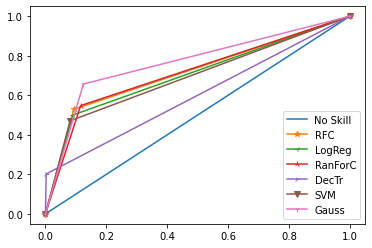

In [403]:
#ROC Curve
auc_rfc = roc_auc_score(y_test, rfc_prediction)
auc_logreg = roc_auc_score(y_test, logreg_prediction)
auc_dt = roc_auc_score(y_test, dt_prediction)
auc_svm = roc_auc_score(y_test, svm_prediction)
auc_mlp = roc_auc_score(y_test, mlp_prediction)
auc_gauss = roc_auc_score(y_test, gauss_prediction)
print('AUC_RFC: %.3f' % auc_rfc)
print('AUC_LR: %.3f' % auc_logreg)
print('AUC_DT: %.3f' % auc_dt)
print('AUC_SVM: %.3f' % auc_svm)
print('AUC_MLP: %.3f' % auc_mlp)
print('AUC_GAUSS: %.3f' % auc_gauss)
# formulating roc curve
fpr, tpr, threshold = roc_curve(y_test, rfc_prediction)
fpr1, tpr1, threshold1 = roc_curve(y_test, logreg_prediction)
fpr2, tpr2, threshold = roc_curve(y_test, dt_prediction)
fpr3, tpr3, threshold1 = roc_curve(y_test, svm_prediction)
fpr4, tpr4, threshold = roc_curve(y_test, mlp_prediction)
fpr5, tpr5, threshold1 = roc_curve(y_test, gauss_prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='-', label='No Skill')
# plot the precision-recall curve for the model
plt.plot(fpr, tpr, marker='*', label='RFC')
plt.plot(fpr1, tpr1, marker='3', label='LogReg')
plt.plot(fpr2, tpr2, marker='2', label='RanForC')
plt.plot(fpr3, tpr3, marker='4', label='DecTr')
plt.plot(fpr4, tpr4, marker='v', label='SVM')
plt.plot(fpr5, tpr5, marker='1', label='Gauss')
plt.legend()
# show the plot
plt.show()

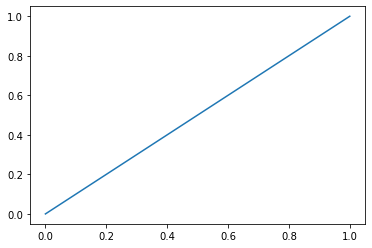

In [394]:
plt.plot([0, 1], [0, 1], linestyle='-', label='No Skill')